### Importar librerias

In [1]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
from scipy.stats import truncnorm

In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Analisamos los tipos de datos de todas las columnas


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Eliminacion de columnas que no nos serviran para el analis (Id, nombres)

In [5]:
df = df.loc[:, ['School_Type', 'Distance_from_Home', 'Previous_Scores', 'Exam_Score',
                'Access_to_Resources', 'Attendance']]

In [6]:
df.columns=['school_type', 'distance_from_home', 'previous_scores', 'exam_score',
                'access_to_resources', 'hours_class']

In [7]:
df = df.dropna()
df.shape[0]

6540

### Separamos las columnas Categoricas y las numericas

In [8]:
num_cols = []
for i in df.columns:
    if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        num_cols.append( i )
num_cols

['previous_scores', 'exam_score', 'hours_class']

In [10]:
cat_cols = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat_cols.append( i )
cat_cols

['school_type', 'distance_from_home', 'access_to_resources']

In [11]:
df.describe()

,previous_scores,exam_score,hours_class
count,6540.000000,6540.000000,6540.000000
mean,75.072936,67.243884,79.998471
std,14.392315,3.896073,11.548299
min,50.000000,55.000000,60.000000
25%,63.000000,65.000000,70.000000
50%,75.000000,67.000000,80.000000
75%,88.000000,69.000000,90.000000
max,100.000000,101.000000,100.000000


In [12]:
# -------------------------------
#  ESTADÍSTICAS DEL DATASET COMPLETO 
# -------------------------------
print(" ESTADÍSTICAS DEL DATASET COMPLETO ")
print(df['previous_scores'].describe())
# -------------------------------
# ANÁLISIS POR 'pulisher' para tratar de verificar que tan bien o mal esta simulado el dataset
# -------------------------------

print("\n------------------------------------------------------------")
print("\n ANÁLISIS POR 'Distance from home' ")
print(" ESTADÍSTICAS PARA 'Near' EN 'distance_from_home'")
print(df[df['distance_from_home'] == 'Near']['previous_scores'].describe())


print("\n------------------------------------------------------------")
print(" ESTADÍSTICAS PARA 'Moderate' EN 'distance_from_home'")
print(df[df['distance_from_home'] == 'Moderate']['previous_scores'].describe())




 ESTADÍSTICAS DEL DATASET COMPLETO 
count    6540.000000
mean       75.072936
std        14.392315
min        50.000000
25%        63.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: previous_scores, dtype: float64

------------------------------------------------------------

 ANÁLISIS POR 'Distance from home' 
 ESTADÍSTICAS PARA 'Near' EN 'distance_from_home'
count    3884.000000
mean       75.175592
std        14.402963
min        50.000000
25%        63.000000
50%        75.000000
75%        87.000000
max       100.000000
Name: previous_scores, dtype: float64

------------------------------------------------------------
 ESTADÍSTICAS PARA 'Moderate' EN 'distance_from_home'
count    1998.000000
mean       74.867367
std        14.576029
min        50.000000
25%        62.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: previous_scores, dtype: float64


### Correlacion entre las variables categoricas con las numericas 

In [13]:
dfi = df.groupby(cat_cols, as_index= False).agg({
    'previous_scores' : 'count'
})

dfi.head(1)

,school_type,distance_from_home,access_to_resources,previous_scores
0,Private,Far,High,68


<Figure size 3000x1500 with 0 Axes>

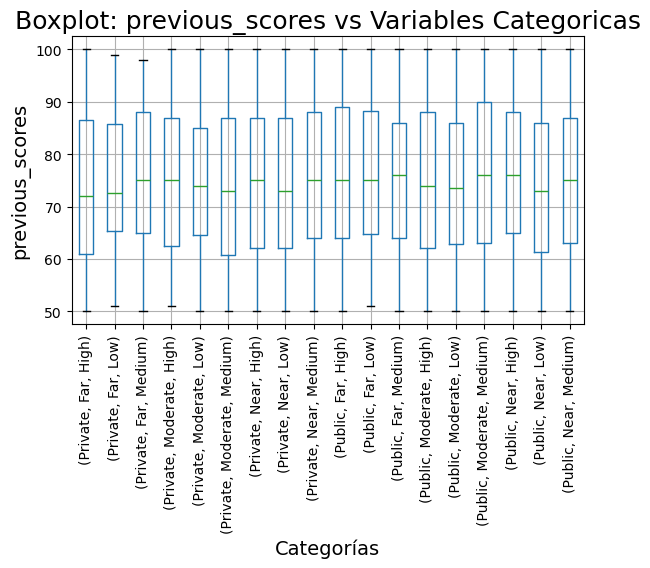

<Figure size 3000x1500 with 0 Axes>

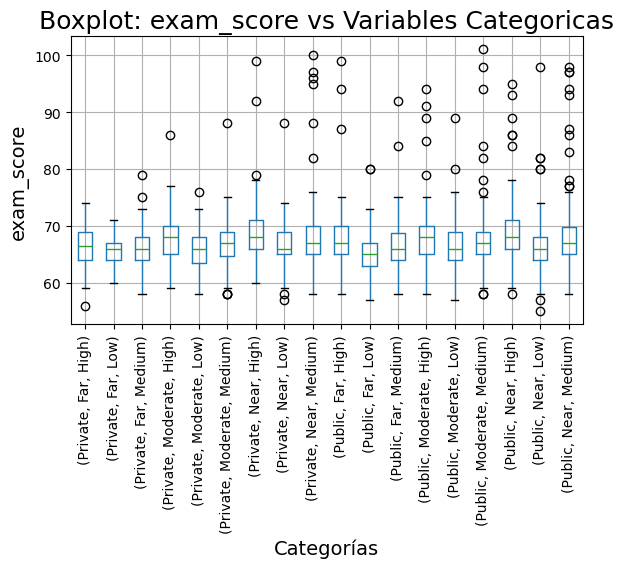

<Figure size 3000x1500 with 0 Axes>

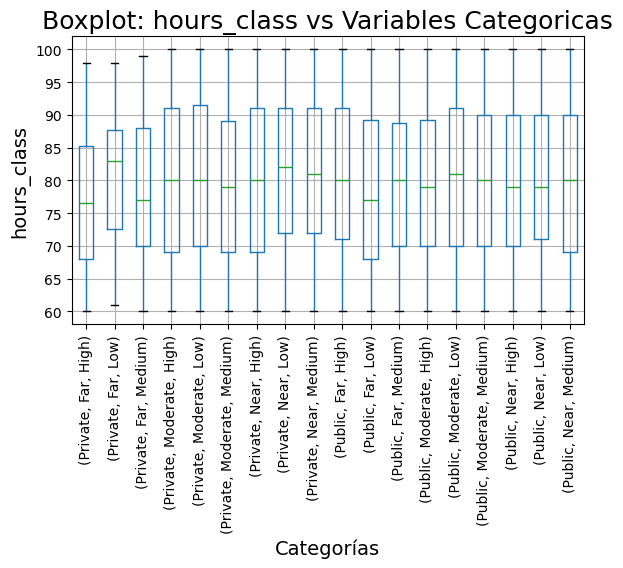

In [ ]:
for num_col in num_cols:
    plt.figure(figsize=(12, 6))  
    
    # Crear boxplot con colores personalizados
    df.boxplot(column=num_col, by=cat_cols,
                    )
    
    # Configuración mínima
    plt.title(f"{num_col}", fontsize=14)
    plt.suptitle(f"Boxplot: {num_col} vs Variables categoricas")
    plt.xticks(rotation=65, ha='right')
    plt.tight_layout()

In [15]:
diccionario = {}
new_col = []
for i in num_cols:
    new_col.append(f"{i}_lower_bound")
    new_col.append(f"{i}_upper_bound")
    diccionario[i] = [
        ('lower_bound' , lambda x: x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))),
        ('upper_bound', lambda x: x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)))
    ]
    


In [16]:
new_col

['previous_scores_lower_bound',
 'previous_scores_upper_bound',
 'exam_score_lower_bound',
 'exam_score_upper_bound',
 'hours_class_lower_bound',
 'hours_class_upper_bound']

In [17]:
dfd = df.groupby( cat_cols, as_index = False).agg(
    diccionario
)

In [18]:
dfd.head(1)

school_type distance_from_home access_to_resources previous_scores  \
                                                         lower_bound   
0     Private                Far                High           22.75   

               exam_score             hours_class              
  upper_bound lower_bound upper_bound lower_bound upper_bound  
0      124.75        56.5        76.5      42.125     111.125

In [19]:
dfd.columns = cat_cols + new_col


In [20]:
df_merge = df.merge(
    dfd,
    on = cat_cols,
    how = 'inner'
)

In [21]:
for i in num_cols:
    df_merge = df_merge.loc[
        (df_merge[i] <= df_merge[f'{i}_upper_bound'])&(df_merge[i] >= df_merge[f'{i}_lower_bound']), :
        ]
    

In [22]:
df_merge.head(1)

,school_type,distance_from_home,previous_scores,exam_score,access_to_resources,hours_class,previous_scores_lower_bound,previous_scores_upper_bound,exam_score_lower_bound,exam_score_upper_bound,hours_class_lower_bound,hours_class_upper_bound
0,Public,Near,73,67,High,84,30.5,122.5,58.5,78.5,40.0,120.0


### Obtenemos las distribuciones probabilisticas 


In [23]:
prob_freq = df.groupby( cat_cols , as_index=False ).agg({
    "exam_score": ["count"]
})

prob_freq.columns = cat_cols + ["prob"]

In [24]:
prob_freq

,school_type,distance_from_home,access_to_resources,prob
0,Private,Far,High,68
1,Private,Far,Low,38
2,Private,Far,Medium,89
3,Private,Moderate,High,191
4,Private,Moderate,Low,123
5,Private,Moderate,Medium,292
6,Private,Near,High,373
7,Private,Near,Low,229
8,Private,Near,Medium,581
9,Public,Far,High,137


In [25]:
np.sum( prob_freq["prob"] / df.shape[0] )

1.0

In [26]:
prob_freq["prob"] = prob_freq["prob"] / df.shape[0] 

In [63]:
prob_freq

,school_type,distance_from_home,access_to_resources,prob
0,Private,Far,High,0.010292
1,Private,Far,Low,0.005751
2,Private,Far,Medium,0.013471
3,Private,Moderate,High,0.028909
4,Private,Moderate,Low,0.018617
5,Private,Moderate,Medium,0.044196
6,Private,Near,High,0.056455
7,Private,Near,Low,0.034660
8,Private,Near,Medium,0.087937
9,Public,Far,High,0.020736


In [27]:
for i in num_cols:

    df_merge = df_merge.loc[ 
        ( df_merge[i] > df_merge[f"{i}_lower_bound"] )
        &
        ( df_merge[i] < df_merge[f"{i}_upper_bound"] )
        , :
    ]

df_merge.head(1)

,school_type,distance_from_home,previous_scores,exam_score,access_to_resources,hours_class,previous_scores_lower_bound,previous_scores_upper_bound,exam_score_lower_bound,exam_score_upper_bound,hours_class_lower_bound,hours_class_upper_bound
0,Public,Near,73,67,High,84,30.5,122.5,58.5,78.5,40.0,120.0


<Figure size 1200x600 with 0 Axes>

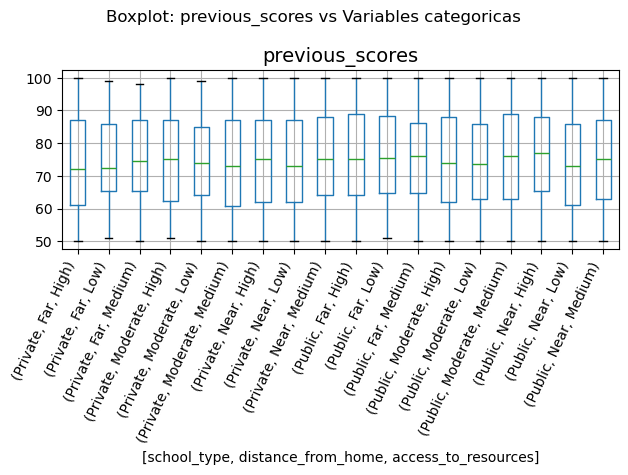

<Figure size 1200x600 with 0 Axes>

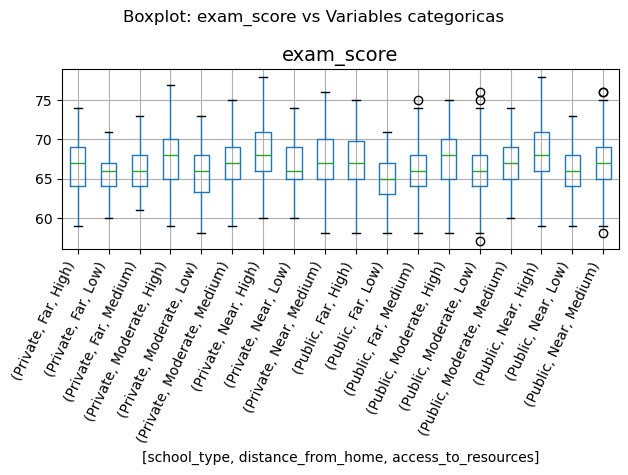

<Figure size 1200x600 with 0 Axes>

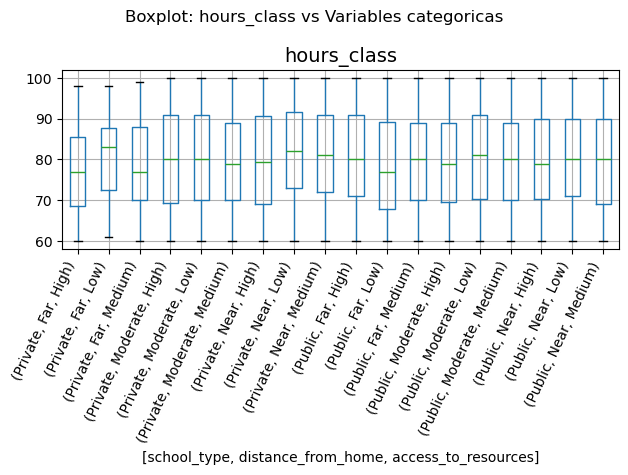

In [55]:
for num_col in num_cols:
    plt.figure(figsize=(12, 6))  
    
    # Crear boxplot con colores personalizados
    df_merge.boxplot(column=num_col, by=cat_cols,
                    )
    
    # Configuración mínima
    plt.title(f"{num_col}", fontsize=14)
    plt.suptitle(f"Boxplot: {num_col} vs Variables categoricas")
    plt.xticks(rotation=65, ha='right')
    plt.tight_layout()

In [29]:
df_clean = df_merge.loc[ : , cat_cols + num_cols ]

In [30]:
summ_aggregations = {}
cols_summ = []
for i in num_cols:
    summ_aggregations[i] = [ "min" , "max" , "mean" , "std" ]
    cols_summ.append( f"{i}_min" )
    cols_summ.append( f"{i}_max" )
    cols_summ.append( f"{i}_mean" )
    cols_summ.append( f"{i}_std" )

In [31]:
summ_aggregations

{'previous_scores': ['min', 'max', 'mean', 'std'],
 'exam_score': ['min', 'max', 'mean', 'std'],
 'hours_class': ['min', 'max', 'mean', 'std']}

### Iniando procedimiento para extender el dataset


In [32]:
df_summ = df_clean.groupby(
    cat_cols
    , as_index=False
).agg(summ_aggregations)

In [33]:
df_summ.columns = cat_cols +  cols_summ

In [34]:
df_summ.head(8).head(1)

,school_type,distance_from_home,access_to_resources,previous_scores_min,previous_scores_max,previous_scores_mean,previous_scores_std,exam_score_min,exam_score_max,exam_score_mean,exam_score_std,hours_class_min,hours_class_max,hours_class_mean,hours_class_std
0,Private,Far,High,50,100,73.358209,15.244176,59,74,66.552239,3.665083,60,98,77.552239,11.31141


In [35]:
size_row = 100000
ids = np.random.choice( prob_freq.index , size=size_row, p=prob_freq["prob"].to_list() )

In [36]:
len( ids[ ids == 0 ] )

1056

In [37]:
len( ids[ ids == 0 ] ) / len( ids )

0.01056

In [38]:
def trunc_vector(min_val, max_val, media, desv_std, size):
    # Calcular los límites 'a' y 'b' para la función truncnorm
    a, b = (min_val - media) / desv_std, (max_val - media) / desv_std
    # Generar muestras de la distribución normal truncada
    muestras = truncnorm.rvs(a, b, loc=media, scale=desv_std, size=size)
    return muestras

In [40]:
values = trunc_vector( 
    df_summ.iloc[0]["previous_scores_min"]
    , df_summ.iloc[0]["previous_scores_max"]
    , df_summ.iloc[0]["previous_scores_mean"]
    , df_summ.iloc[0]["previous_scores_std"]
    , len( ids[ ids == 0 ] )
)

In [41]:
pd.DataFrame({
    "id": ids[ ids == 0 ]
    , "previous_scores": values
}).describe()

,id,previous_scores
count,1056.0,1056.000000
mean,0.0,74.157176
std,0.0,11.961149
min,0.0,50.183422
25%,0.0,65.046200
50%,0.0,73.751577
75%,0.0,83.062379
max,0.0,99.929939


In [42]:
df_summ.head(2)

,school_type,distance_from_home,access_to_resources,previous_scores_min,previous_scores_max,previous_scores_mean,previous_scores_std,exam_score_min,exam_score_max,exam_score_mean,exam_score_std,hours_class_min,hours_class_max,hours_class_mean,hours_class_std
0,Private,Far,High,50,100,73.358209,15.244176,59,74,66.552239,3.665083,60,98,77.552239,11.311410
1,Private,Far,Low,51,99,73.526316,13.391681,60,71,65.421053,2.595543,61,98,80.921053,10.718465


In [43]:
dfextended = pd.DataFrame()
for i in prob_freq.index:
    setting = {
        "id": ids[ ids == i ]
    }
    for c in num_cols:
        setting[c] = trunc_vector( 
            df_summ.iloc[i][f"{c}_min"]
            , df_summ.iloc[i][f"{c}_max"]
            , df_summ.iloc[i][f"{c}_mean"]
            , df_summ.iloc[i][f"{c}_std"]
            , len( ids[ ids == i ] )
        )
    tmp = pd.DataFrame(setting)
    dfextended = pd.concat( [ dfextended , tmp ] )

In [44]:
dfextended

,id,previous_scores,exam_score,hours_class
0,0,72.929297,65.948617,69.263059
1,0,75.286706,66.498730,76.579235
2,0,76.026512,61.346273,92.569946
3,0,77.908843,61.694435,76.734396
4,0,78.797930,62.692520,81.775317
...,...,...,...,...
21202,17,75.001739,65.505802,81.678129
21203,17,82.367241,68.517291,97.407209
21204,17,76.626007,70.641941,75.412937
21205,17,53.729505,66.762024,91.188636


In [45]:
prob_freq["id"] = prob_freq.index

In [46]:
final = prob_freq.loc[ : , ["id"] + cat_cols ].merge(
    dfextended
    , on=["id"]
    , how="inner"
)

In [47]:
["id"] + cat_cols

['id', 'school_type', 'distance_from_home', 'access_to_resources']

In [49]:
df_clean.groupby(
    cat_cols
    , as_index=False
).agg({
    'previous_scores': [ "min" , "max" , "mean" , "std" , "count" ]
}).iloc[16]

school_type                      Public
distance_from_home                 Near
access_to_resources                 Low
previous_scores      min             50
                     max            100
                     mean     73.879541
                     std       14.27772
                     count          523
Name: 16, dtype: object

In [51]:
final.groupby(
    cat_cols
    , as_index=False
).agg({
    'previous_scores': [ "min" , "max" , "mean" , "std" , "count" ]
}).iloc[16]

school_type                      Public
distance_from_home                 Near
access_to_resources                 Low
previous_scores      min      50.008978
                     max      99.977988
                     mean     74.001132
                     std      11.643505
                     count         8185
Name: 16, dtype: object